# Example 4 - BPTT vs. RFLO

December 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import stats, interpolate
from scipy import linalg as LA

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("..")

In [2]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.bptt import BPTT
from algorithms.rflo import RFLO
from algorithms.reinforce import REINFORCE

from utils.plotting import plot_trained_trajectories

### Train RNN on four targets

In [3]:
trial_duration = 20
n_in=4
frac_on = 0.5

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

## Define network hyperparameters

In [4]:
# Set RNN Parameters
params = RNNparams(n_in=4,n_rec=50,n_out=2,tau_rec=5,
               eta_in=0.1,eta_rec=0.1,eta_out=0.1,
               sig_in=0.0,sig_rec=0.1,sig_out=0.01,
               velocity_transform=True, tau_vel = 5, dt_vel = 0.1,
               rng=np.random.RandomState(1))

## 1. Using BPTT to train `w_rec` only (with velocity transformation)

We can see here that BPTT learns much faster than RFLO

### 1a: BPTT, All Weights (`W_in`,`W_rec`,`W_out`)

16it [00:00, 156.82it/s]

>> TODO: Learning rule for w_fb not currently implemented for BPTT


500it [00:01, 379.65it/s]


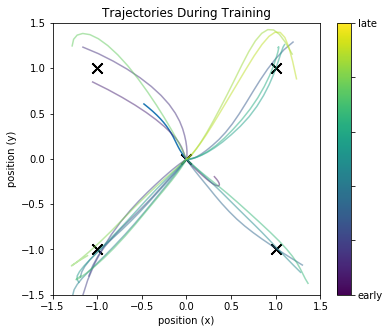

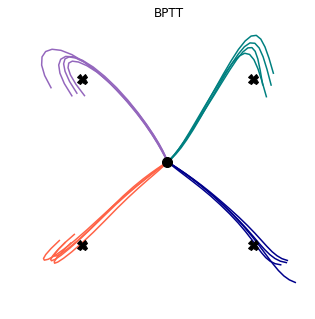

In [5]:

# Initialize RNN
net = RNN(params)

# initialize simulation
sim = Simulation(net)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algorithm
bptt = BPTT(net,apply_to=['w_in','w_rec','w_out'],online=False) 


sim.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[bptt], probe_types=['h','y_out','pos'], plot=True, plot_freq=25)

fig = plot_trained_trajectories(sim=sim, tasks=[task1,task2,task3,task4],title='BPTT')

### 1b: BPTT, `W_out` Only

3it [00:00, 29.65it/s]

>> TODO: Learning rule for w_fb not currently implemented for BPTT


500it [00:00, 507.78it/s]


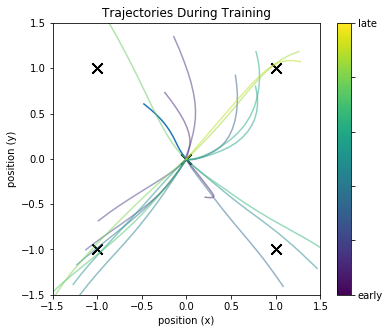

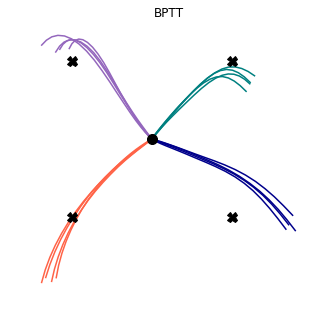

In [6]:

# Initialize RNN
net = RNN(params)

# initialize simulation
sim = Simulation(net)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algorithm
bptt = BPTT(net,apply_to=['w_out'],online=False) 


sim.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[bptt], probe_types=['h','y_out','pos'], plot=True, plot_freq=25)

fig = plot_trained_trajectories(sim=sim, tasks=[task1,task2,task3,task4],title='BPTT')

### 1c: BPTT, `W_rec` only

14it [00:00, 138.88it/s]

>> TODO: Learning rule for w_fb not currently implemented for BPTT


500it [00:01, 465.84it/s]


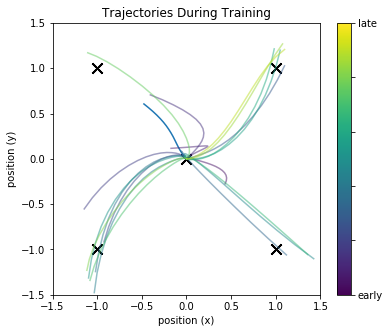

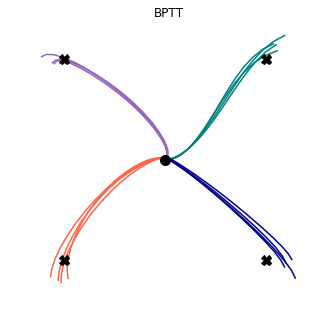

In [7]:

# Initialize RNN
net = RNN(params)

# initialize simulation
sim = Simulation(net)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algorithm
bptt = BPTT(net,apply_to=['w_rec'],online=False) 


sim.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[bptt], probe_types=['h','y_out','pos'], plot=True, plot_freq=25)

fig = plot_trained_trajectories(sim=sim, tasks=[task1,task2,task3,task4],title='BPTT')

### 1d: BPTT, `W_in` only

28it [00:00, 279.76it/s]

>> TODO: Learning rule for w_fb not currently implemented for BPTT


500it [00:01, 454.07it/s]


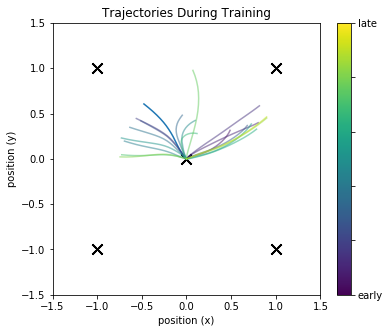

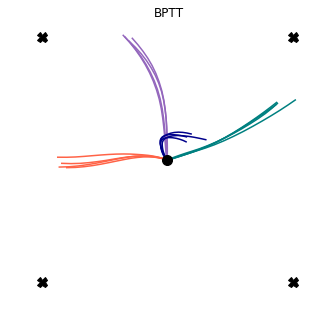

In [8]:

# Initialize RNN
net = RNN(params)

# initialize simulation
sim = Simulation(net)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algsorithm
bptt = BPTT(net,apply_to=['w_in'],online=False) 


sim.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[bptt], probe_types=['h','y_out','pos'], plot=True, plot_freq=25)

fig = plot_trained_trajectories(sim=sim, tasks=[task1,task2,task3,task4],title='BPTT')

## 2. Train with RFLO 

### 2a. RFLO, All Weights

500it [00:01, 340.86it/s]


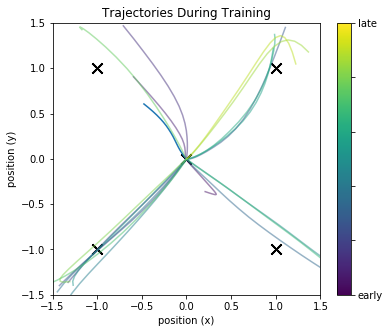

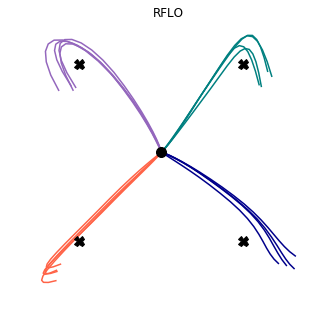

In [9]:


# Initialize RNN
net = RNN(params)

# initialize simulation
sim = Simulation(net)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algorithm
rflo = RFLO(net,apply_to=['w_in','w_rec','w_out'],online=False,weight_transport=True) 


sim.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['h','y_out','pos'], plot=True, plot_freq=25)

fig = plot_trained_trajectories(sim=sim, tasks=[task1,task2,task3,task4],title='RFLO')


### 2b. RFLO, `W_rec` only

1000it [00:02, 469.64it/s]


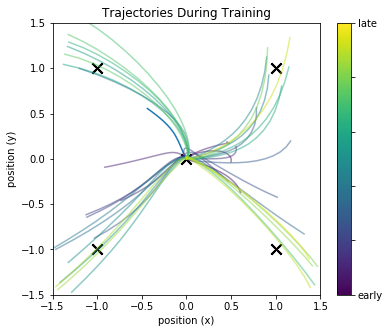

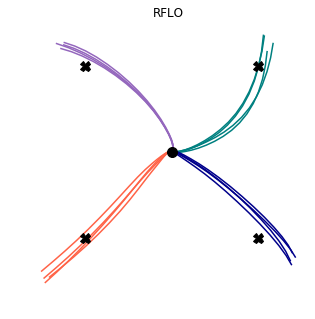

In [10]:


# Initialize RNN
net = RNN(params)

# initialize simulation
sim = Simulation(net)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algorithm
rflo = RFLO(net,apply_to=['w_rec'],online=False,weight_transport=False) 


sim.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['h','y_out','pos'], plot=True, plot_freq=25)

fig = plot_trained_trajectories(sim=sim, tasks=[task1,task2,task3,task4],title='RFLO')
